In [1]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
import pandas as pd
import json
import seaborn as sns

In [2]:
password_response, time_response, survey_response = get_responses(2)

Total: 26


## Password Analysis

In [3]:
pd.DataFrame(password_response)
# password_response.head(5)

,password2,password2_recall1,password2_recall2,password2_recall3
0,1trdiayw$&,1trdiayw&$,1trdiayw&$,NaN
1,Password123!,NaN,NaN,NaN
2,IWTCDTE!,NaN,NaN,NaN
3,TtI7fA!,TtI5fA!,TtI5fA!,Tt5IfA!
4,MD!wtsf,NaN,NaN,NaN
5,daniel123,NaN,NaN,NaN
6,victor12,NaN,NaN,NaN
7,chris2022#,NaN,NaN,NaN
8,Igmp4mn@,NaN,NaN,NaN
9,tiabobs662!,tiabobs6662!,tiabobs666!,tiabobs662!!


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,10.255,32.479,18.423,107.595,84.749,322.202,17.036,101.708,27.493,65.827,68.461,60.278,15.275100
1,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283
2,5.027,10.247,9.382,129.634,38.683,218.244,10.890,51.043,13.859,28.621,9.081,34.495,9.320100
3,18.356,22.397,20.612,131.234,83.170,232.352,16.031,58.063,12.983,47.824,39.006,51.086,12.218567
4,4.906,17.022,13.134,105.295,60.117,183.871,13.250,34.445,28.712,33.622,18.875,37.998,9.187450


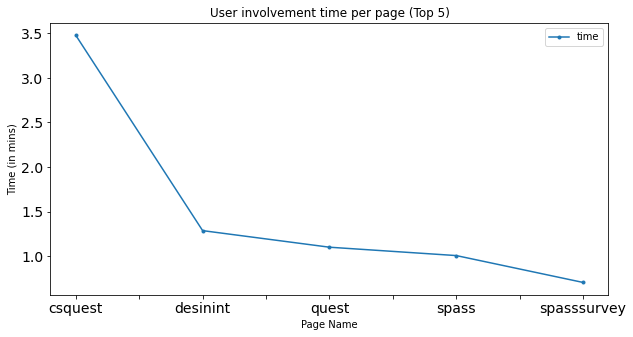

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [5]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [6]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
rewarding,2.0,-2.0,1.0,2.0,0.0,2.0,-2.0,-1.0,2.0,2.0,...,1.0,3.0,2.0,-1.0,0.0,3.0,1.0,1.269231,2.000000,1.486113
beneficial,3.0,-2.0,2.0,1.0,2.0,2.0,-1.0,2.0,2.0,3.0,...,3.0,3.0,2.0,-2.0,2.0,2.0,1.0,1.730769,2.000000,1.403505
ordered,2.0,-1.0,1.0,3.0,2.0,2.0,-1.0,2.0,3.0,3.0,...,2.0,3.0,1.0,-3.0,3.0,2.0,3.0,1.615385,2.000000,1.636352
organized,3.0,0.0,3.0,3.0,3.0,2.0,1.0,0.0,2.0,3.0,...,3.0,3.0,1.0,0.0,2.0,2.0,2.0,2.038462,2.000000,1.070877
structured,3.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,...,3.0,3.0,2.0,0.0,2.0,2.0,3.0,1.884615,2.000000,1.165343
well grouped,2.0,-1.0,2.0,3.0,2.0,3.0,2.0,-2.0,2.0,2.0,...,2.0,3.0,1.0,2.0,1.0,3.0,2.0,1.692308,2.000000,1.211515
helpful,3.0,-1.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,3.0,3.0,2.0,1.0,1.0,2.0,1.0,2.269231,2.269231,0.925270
easy,2.0,-1.0,2.0,2.0,3.0,2.0,0.0,1.0,3.0,2.0,...,2.0,3.0,1.0,0.0,1.0,3.0,-1.0,1.500000,2.000000,1.499890
pleasant,3.0,-1.0,0.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,...,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.884615,2.000000,1.099944
clear,3.0,-2.0,2.0,3.0,3.0,2.0,-1.0,2.0,3.0,2.0,...,2.0,3.0,2.0,-2.0,1.0,3.0,2.0,1.846154,2.000000,1.603323


In [7]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')
    print(10*'*')


Perspicuity: 1.701923076923077
Perspicuity: 0.12369606587838236
**********
Aesthetics: 1.5384615384615388
Aesthetics: 0.28245570120050356
**********
Usefulness: 1.6634615384615385
Usefulness: 0.3808815871069087
**********
Clarity: 1.8076923076923075
Clarity: 0.25048836383973433
**********


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('qualitative/csquest_info.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
9-1,"[Social Media, Email, Financial Websites, Gami...",[None of the above],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Government Websites, Con...","[Social Media, Course Management Websites, e.g...","[Social Media, Email, E-commerce Websites, Gov...","[Social Media, Email]",[Social Media],"[Social Media, Email, Financial Websites]","[Social Media, Financial Websites, E-commerce ...",...,"[Social Media, Email, Financial Websites, E-co...","[Social Media, Gaming Websites, Government Web...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Financial Websites, Gami...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Email, Financial Websites]","[Financial Websites, Government Websites, Cour...","[Social Media, Email, Government Websites]","[Social Media, Course Management Websites, e.g..."
11-1,This is entertaining and relatable! It is an i...,I thought about if I would personally use this...,It is nice. Simple to read and understand. S...,I like it. It gave me a way to come up with a ...,I think that it is clean and concise and under...,good,easy,The presentation of the design is very attract...,It is novel and creative way of learning how t...,I think it's a great idea and a nice design. ...,...,IN THIS PRESENTATION HAVE BEEN VERY USEFUL TO ...,very nice presentation of this design,It's very creative and easy to understand with...,"Organized, clear and a good idea message not t...","novel, engaging","Very well done, it makes it appealing to read it.",the presentation will very nice and very good...,It's in a simple comic format that nothing rea...,It is very useful in guiding about the passwor...,The presentation is clear and concise. Straigh...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

# new_columns = {}
# for qsid in csquestquant.columns:
#     new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
# csquestquant.rename(columns=new_columns, inplace=True)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Stimulation,2.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,3.0,3.0,...,0.0,3.0,1.0,2.0,-1.0,2.0,0.0,1.769231,2.0,1.165344
Trust,3.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,3.0,3.0,...,1.0,3.0,2.0,1.0,0.0,3.0,0.0,1.500000,1.5,1.224745
Real life encouragement,3.0,1.0,2.0,2.0,2.0,3.0,0.0,1.0,3.0,3.0,...,2.0,3.0,2.0,2.0,-2.0,3.0,1.0,1.884615,2.0,1.314685
Example helped,3.0,1.0,2.0,3.0,2.0,2.0,1.0,0.0,3.0,3.0,...,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.076923,2.0,0.978507
Encouragement,3.0,2.0,3.0,2.0,0.0,2.0,1.0,0.0,3.0,2.0,...,1.0,3.0,0.0,1.0,0.0,3.0,1.0,1.730769,2.0,1.235063
Capable,3.0,0.0,3.0,3.0,2.0,3.0,0.0,1.0,3.0,3.0,...,3.0,3.0,3.0,3.0,1.0,2.0,0.0,2.153846,3.0,1.218302
Confident,3.0,1.0,3.0,3.0,2.0,2.0,1.0,1.0,3.0,3.0,...,2.0,3.0,3.0,0.0,0.0,3.0,0.0,2.115385,3.0,1.112362
Personal Connection,0.0,-1.0,0.0,1.0,3.0,3.0,0.0,1.0,3.0,3.0,...,0.0,3.0,2.0,1.0,2.0,2.0,1.0,1.615385,2.0,1.280863
Ease to follow pages,3.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,3.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,2.0,2.038462,2.0,0.961537
Novel,3.0,-2.0,1.0,1.0,-1.0,2.0,1.0,1.0,2.0,2.0,...,1.0,3.0,2.0,3.0,-1.0,1.0,1.0,1.038462,1.0,1.598181


### First Password Survey

In [10]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass['std'] = fpass.std(axis=1)

fpass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,std
"I do not change my passwords, unless I have to.",6,7,2,3,7,7,6,6,6,6,...,6,4,2,6,6,6,7,5.461538,6.0,1.370876
I use different passwords for different online accounts that I have.,6,5,6,7,1,6,5,5,1,3,...,2,5,7,4,2,7,5,4.692308,5.0,1.901556
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,6,6,7,1,7,4,6,2,6,...,3,4,7,4,3,6,5,4.846154,5.0,1.714939
I do not include special characters in my password if it’s not required.,1,4,2,4,5,6,4,5,5,1,...,5,1,1,4,5,6,2,3.576923,4.0,1.810655


### Second Password Survey

In [11]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())
qualindex = ['8-1']
spassqual = spass.loc[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_consequences.csv')
spassqual
spassqual.T.value_counts().plot.bar()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,I used a variation of the strategy presented i...,I used a totally different strategy.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a totally different strategy.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,...,I used a totally different strategy.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...


In [13]:
spass = spass.drop(qualindex).fillna(0).astype(int)
spass.drop(attention.get('12'), inplace=True)

normqsid = ['3-1', '3-2', '3-3', '7-1']
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)


# normalize scale 1 to 8 to scale -3 to 3
spass = spass - 4
spass.update(spass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass['STD'] = spass.std(axis=1)

spass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Password Strength,3.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,2.0,...,2.0,3.0,2.0,2.0,1.0,3.0,1.0,2.115385,2.0,0.785675
Motivation After Design,3.0,0.0,2.0,3.0,2.0,3.0,1.0,2.0,3.0,2.0,...,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.115385,2.0,0.874890
Hard to Remember,1.0,3.0,2.0,0.0,2.0,-2.0,-1.0,0.0,3.0,-1.0,...,2.0,3.0,-2.0,-2.0,-1.0,-1.0,-3.0,0.653846,1.0,2.036702
Guessed by Hacker,2.0,3.0,2.0,2.0,2.0,-3.0,-1.0,3.0,3.0,2.0,...,3.0,3.0,3.0,-1.0,2.0,2.0,3.0,1.846154,2.0,1.580054
Guessed by FnF,3.0,3.0,3.0,3.0,3.0,-2.0,0.0,-1.0,3.0,2.0,...,3.0,3.0,3.0,-2.0,3.0,2.0,3.0,1.807692,3.0,1.957032
Stronger than Usual,3.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,3.0,0.0,...,3.0,3.0,2.0,3.0,1.0,1.0,-1.0,1.538462,2.0,1.227267
Helpful,3.0,-2.0,1.0,3.0,3.0,3.0,0.0,2.0,3.0,2.0,...,2.0,3.0,2.0,1.0,1.0,2.0,0.0,1.884615,2.0,1.165343
Easy to think memory,3.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,...,3.0,3.0,2.0,2.0,-1.0,3.0,-2.0,1.461538,2.0,1.572226
Difficult for num&char,3.0,1.0,3.0,2.0,2.0,-3.0,0.0,-3.0,3.0,2.0,...,3.0,-3.0,2.0,-2.0,-1.0,-2.0,-3.0,0.461538,1.0,2.149428


### Demographics

In [14]:
# demo = pd.DataFrame(survey_response_df['14'].to_dict())

# new_index = {}
# for qsid in demo.index:
#     new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

# demo = demo.rename(new_index).transpose()
# demo.head(5)


demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo['race'] = demo['race'].str[0]


<AxesSubplot:xlabel='gender', ylabel='count'>

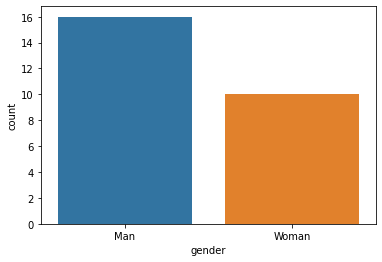

In [15]:
demo['gender'].value_counts()
sns.countplot(data=demo, x='gender', order=demo.gender.value_counts().index)

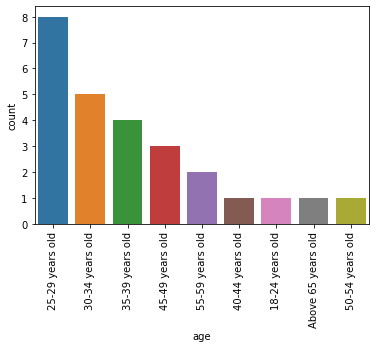

In [16]:
demo['age'].value_counts()
ax = sns.countplot(data=demo, x='age', order=demo.age.value_counts().index)
ax.tick_params(axis='x', rotation=90)


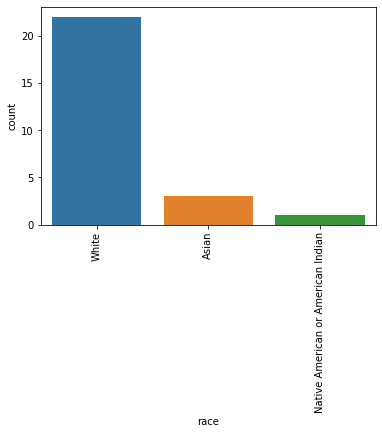

In [17]:
demo['race'].value_counts()
ax = sns.countplot(data=demo, x='race', order=demo.race.value_counts().index)
ax.tick_params(axis='x', rotation=90)
